In [1]:
import pandas as pd
#read csv /Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/save_for_label_df_DONE_1.csv
df_attack=pd.read_csv('/Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/save_for_label_df_DONE_1.csv')

In [2]:
df_attack

,Unnamed: 0,serial_number,User Name,URL,Post Created,combined_text,mention_other,mentioned_other,attack,target,description
0,181,500,TerryGou1018,https://www.facebook.com/100044631150325/posts...,2023-08-28 10:02:02 CST,【主流民意大聯盟】記者會,yes,主流民意大聯盟,no,NaN,NaN
1,147,501,TerryGou1018,https://www.facebook.com/100044631150325/posts...,2023-08-28 12:30:04 CST,【郭台銘參選中華民國總統聲明】 我郭台銘，今天鄭重向各位報告，我決定以總統參選人的身分，投入...,yes,"民進黨, 藍白, 主流民意大聯盟",yes,民進黨,"Big criticism on everything 民進黨, also mentions..."
2,219,511,TerryGou1018,https://www.facebook.com/100044631150325/posts...,2023-08-30 06:00:35 CST,主流民意，希望庶民的生活能真正被改變！ 年輕時，我曾經當過六年的運將，不過不是載人，而是載貨...,yes,"主流民意大聯盟, 柯",no,NaN,NaN
3,177,515,TerryGou1018,https://www.facebook.com/100044631150325/posts...,2023-08-30 15:30:50 CST,如果連領獎學金都可以批鬥，代表這是一個失去良知的政黨。 我是白手起家，能有今日要感謝諸多貴人...,yes,民進黨,yes,民進黨,NaN
4,1021,521,TerryGou1018,https://www.facebook.com/100044631150325/posts...,2023-08-31 15:04:23 CST,兩岸交流，不能再拖下去了，我呼籲陸委會立刻開放陸客來台！ 走過疫情寒冬，各國早已恢復交流，今...,yes,"民進黨, 賴",yes,"民進黨, 賴",Criticism on 兩岸 policy
...,...,...,...,...,...,...,...,...,...,...,...
403,141,1279,chingte,https://www.facebook.com/100044573580122/posts...,2023-12-03 19:59:12 CST,為了台灣的未來，我們做伙打拚，做伙撩下去！ ​ 再過 41 天，我們就要投票了。今天是我們的...,yes,"國民黨, 藍白, 吳, 在野黨",yes,"國民黨, 藍白, 在野黨, 侯, 柯",我們的對手，雖然用不同的政黨參選。但他們都共同喊出重啟服貿；他們一個接受九二共識，一個高喊兩...
404,945,1284,chingte,https://www.facebook.com/100044573580122/posts...,2023-12-04 18:11:01 CST,艋舺青山宮是台灣國家無形文化的資產！ ​ 今天早上，來到艋舺青山宮，參加靈安尊王的正日遶境，...,yes,吳,no,NaN,NaN
405,535,1309,chingte,https://www.facebook.com/100044573580122/posts...,2023-12-07 17:08:27 CST,勇敢堅強、守護台灣，支持許淑華、吳崢！ ​ 走過前幾天陰雨綿綿的天氣，今天是個陽光明媚的好日...,yes,吳,no,NaN,NaN
406,489,1311,chingte,https://www.facebook.com/100044573580122/posts...,2023-12-07 20:00:04 CST,台灣是一個多元包容的大家庭，新住民朋友是我們很重要的家人。 ​ 我們有將近 60 萬的新住民...,yes,吳,no,NaN,NaN


In [3]:
#check values in attack column
df_attack['attack'].value_counts()

attack
yes    236
no     172
Name: count, dtype: int64

In [4]:
#ok now we have to merge it with the original df to compare the stuff. Or wait maybe we don't 
#we just have to do a comparison and we can filter out the serial number based on the attack_df...
#yeha that is probably a better idea... 

In [5]:
#only keep the columns where 'attack' is 'yes'
df_attack_yes=df_attack[df_attack['attack']=='yes']


In [7]:
df_attack_yes['User Name'].value_counts()

User Name
houyuih         112
DoctorKoWJ       72
TerryGou1018     33
chingte          19
Name: count, dtype: int64

/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_77414/3920186936.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_attack_yes['Post Created'] = pd.to_datetime(df_attack_yes['Post Created'])
/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_77414/3920186936.py:6: FutureWarning: Parsing '{res.tzname}' as tzlocal (dependent on system timezone) is deprecated and will raise in a future version. Pass the 'tz' keyword or call tz_localize after construction instead
  df_attack_yes['Post Created'] = pd.to_datetime(df_attack_yes['Post Created'])
/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_77414/3920186936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

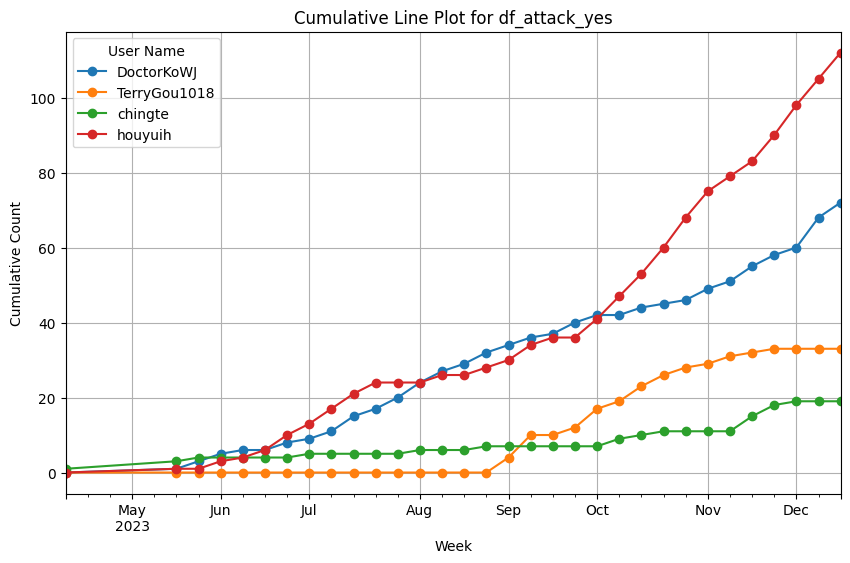

In [6]:
#plot df_attack_yes 
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Post Created' is the column containing the timestamp
df_attack_yes['Post Created'] = pd.to_datetime(df_attack_yes['Post Created'])

# Create a new column for the week
df_attack_yes['Week'] = df_attack_yes['Post Created'].dt.to_period('W')

# Group by 'Week' and 'User Name', then count occurrences
grouped_data = df_attack_yes.groupby(['Week', 'User Name']).size().reset_index(name='Count')

# Pivot the DataFrame to have 'User Name' as columns
pivot_data = grouped_data.pivot(index='Week', columns='User Name', values='Count').fillna(0)

# Create a cumulative sum for each column
cumulative_data = pivot_data.cumsum()

# Plotting
cumulative_data.plot.line(figsize=(10, 6), marker='o')

# Customize the plot
plt.title('Cumulative Line Plot for df_attack_yes')
plt.xlabel('Week')
plt.ylabel('Cumulative Count')
plt.legend(title='User Name')
plt.grid(True)
plt.show()
